In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.signal import argrelmin, argrelmax

import os

In [2]:
os.listdir('../data')

['MOD-00094 3.1.23 to 4.6.23.csv']

In [3]:
# Load the data
df = pd.read_csv('../data/MOD-00094 3.1.23 to 4.6.23.csv', index_col='timestamp_local', parse_dates=True)

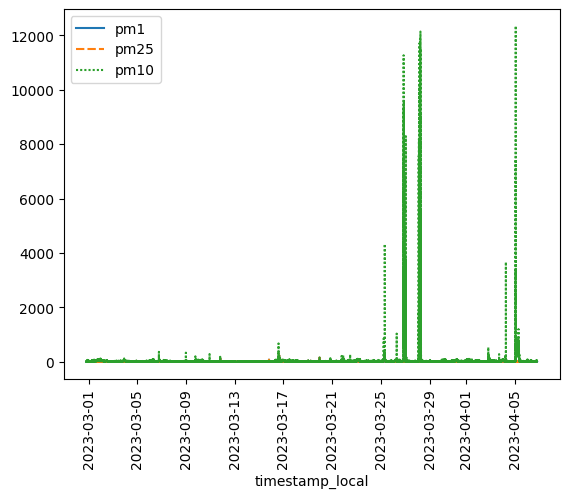

In [4]:
plt.xticks(rotation=90)
sns.lineplot(data=df[['pm1', 'pm25', 'pm10']])
plt.show()

Definitely worse on some days than others, especially pm10. Let's plot them individually.

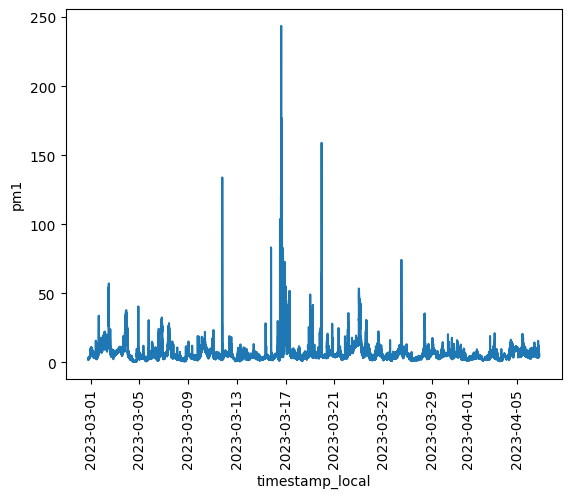

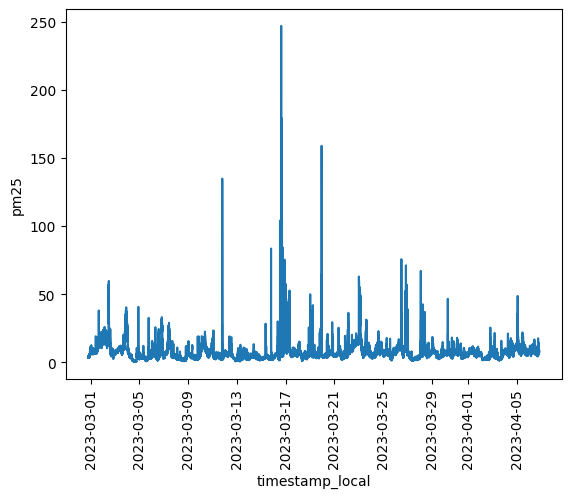

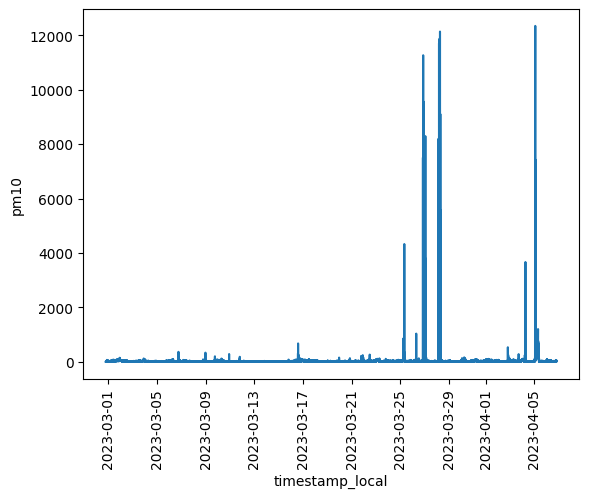

In [5]:
plt.xticks(rotation=90)
sns.lineplot(data=df['pm1'])
plt.show()

plt.xticks(rotation=90)
sns.lineplot(data=df['pm25'])
plt.show()

plt.xticks(rotation=90)
sns.lineplot(data=df['pm10'])
plt.show()

Looks like they spike on different days, on different scales. pm10 on its own schedule compared with pm25 and pm1. We'll also want to normalize these.

Can we zoom in on those bad days?

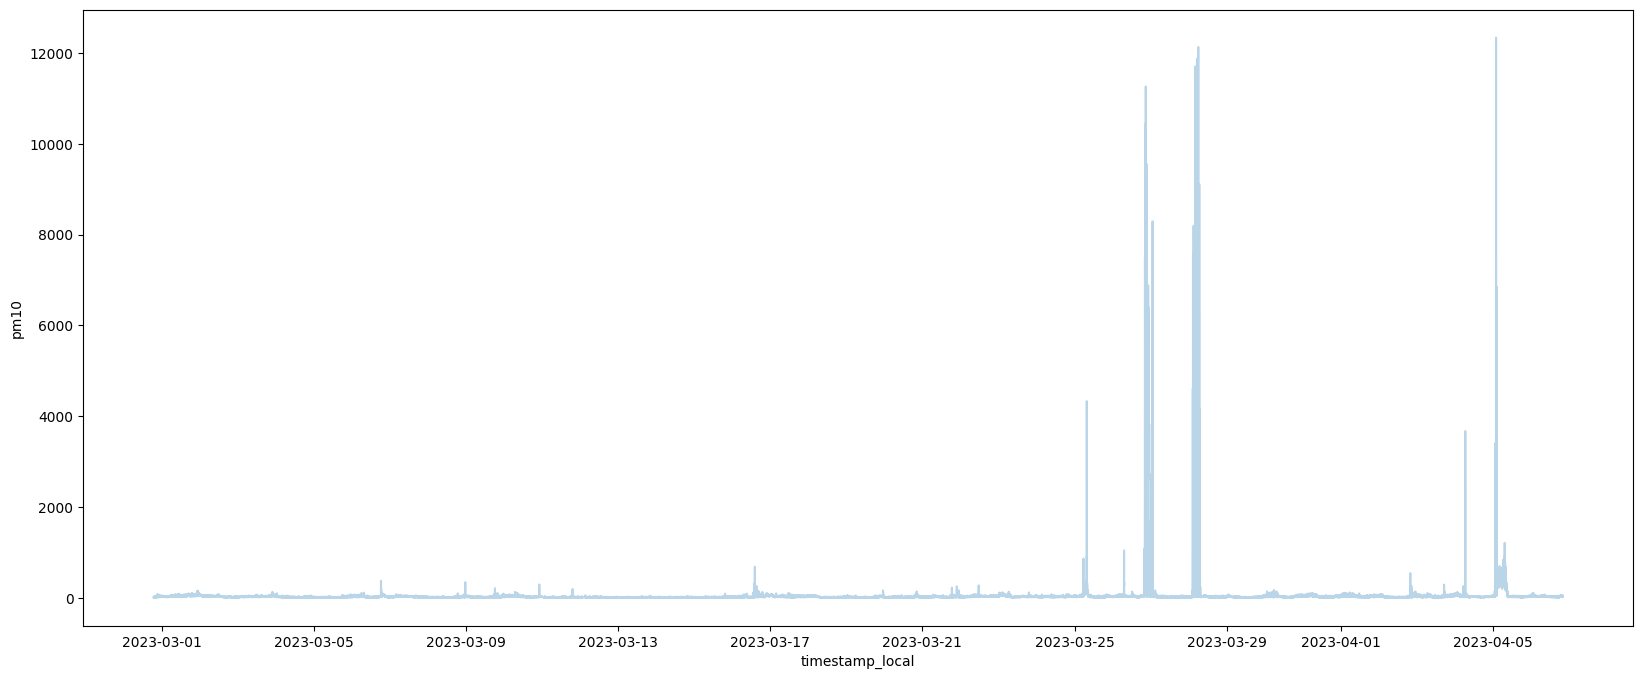

In [6]:
# Get the relative maximum for pm10
ilocs_max = argrelmax(df['pm10'].values, order=1000)[0]

# Plot it with the max values as ^
plt.figure(figsize=(20,8))
sns.lineplot(data=df['pm10'], alpha=.3)
sns.scatterplot(data=df['pm10'].iloc[ilocs_max], lw=10, color='green', marker='^')
plt.show()

Here are our maxes for pm10! Let's get the timestamps so we can go back and see what's going on.

In [7]:
# Look at what days our pm10 sensors had peaks at.
df.iloc[ilocs_max][['pm10']]

,pm10
timestamp_local,
2023-04-05 01:57:45+00:00,12339.641
2023-04-04 06:32:52+00:00,3668.956
2023-04-02 19:51:26+00:00,538.047
2023-04-01 05:47:25+00:00,112.441
2023-03-31 06:20:25+00:00,95.959
2023-03-30 05:49:25+00:00,167.097
2023-03-29 01:07:25+00:00,65.161
2023-03-28 06:05:25+00:00,12131.539
2023-03-26 20:57:07+00:00,11262.141


Let's do the same for pm2.5 too:

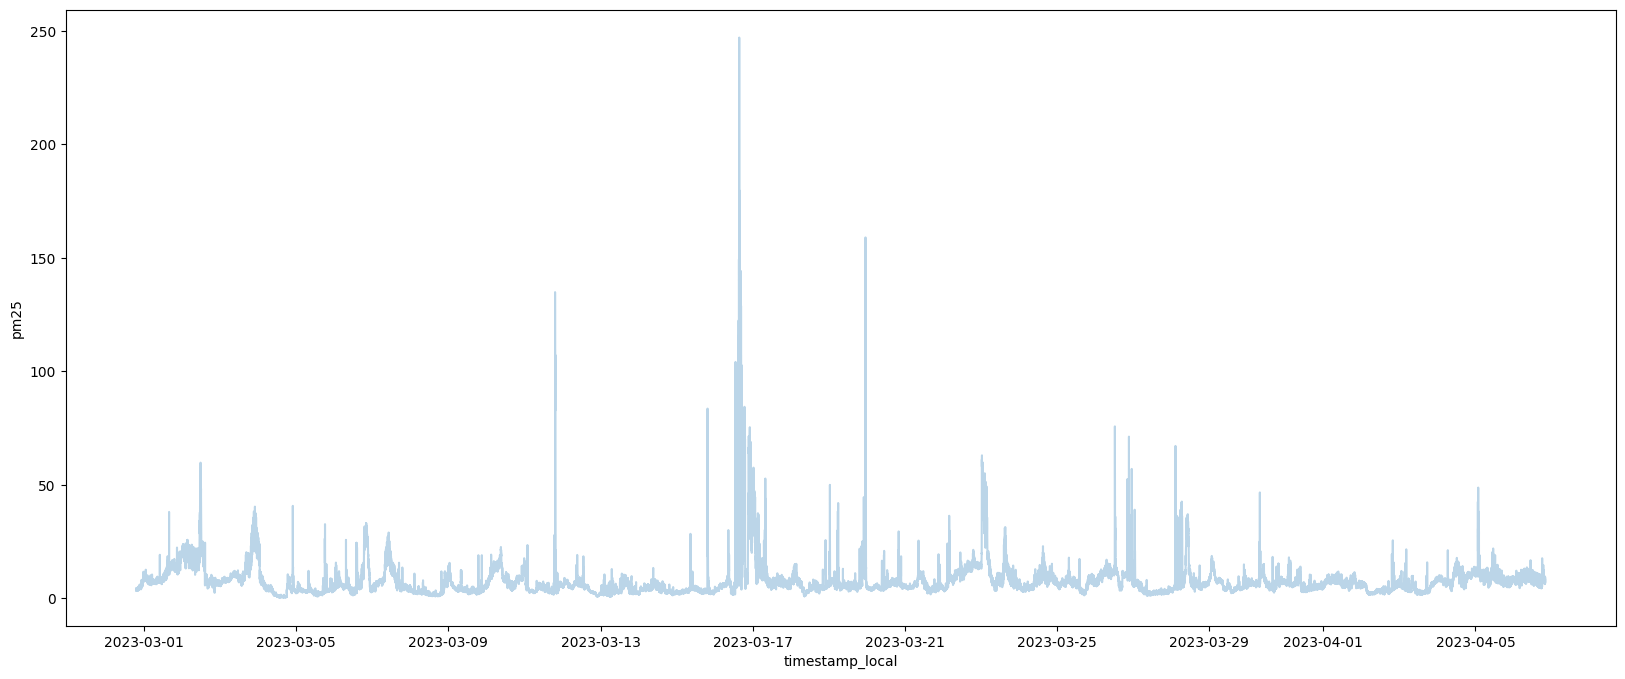

In [8]:
ilocs_max = argrelmax(df['pm25'].values, order=500)[0]

plt.figure(figsize=(20,8))
sns.lineplot(data=df['pm25'], alpha=.3)
sns.scatterplot(data=df['pm25'].iloc[ilocs_max], lw=10, color='green', marker='^')
plt.show()

Looks like there's more peaks. 

In [9]:
# Look at what days our pm2.5 sensors had peaks at.
df.iloc[ilocs_max][['pm25']]

,pm25
timestamp_local,
2023-04-06 18:04:47+00:00,17.562
2023-04-05 11:10:45+00:00,21.869
2023-04-05 01:44:45+00:00,48.703
2023-04-04 06:32:52+00:00,21.111
2023-04-03 17:31:52+00:00,15.757
2023-04-03 04:20:26+00:00,21.493
2023-04-02 19:51:26+00:00,25.456
2023-04-01 19:39:25+00:00,11.435
2023-04-01 09:27:25+00:00,11.727


Cool, will use this to look at the video feeds and check if they correlate with CAFO activity.
Also need to remember to do things like dropna, make sure `device_state` is "ACTIVE" and whatnot when training